Steps to find correlation between features and remove highly correlated features
So, here are the necessary steps to find correlations between features and remove highly correlated features:
Table of Contents

    Step 1 - Import the library
    Step 2 - Set the data
    Step 3 - Create the correlation matrix and select the lower triangular matrix
    Step 5 - Drop the column with high correlation
    Step 6 - Analyze the output

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from knn import KNN
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [2]:
female_data = pd.read_csv("ANSUR_II_FEMALE_Public.csv")
female_data.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [3]:
male_data = pd.read_csv("ANSUR_II_MALE_Public.csv")
male_data.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [4]:
data = pd.concat([female_data,male_data])
data

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,29442,235,1353,312,216,1263,228,193,384,318,...,Combat Arms,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand
4078,29443,247,1473,336,234,1346,253,196,428,374,...,Combat Arms,91B,Oklahoma,1,NaN,1,22,71,194,Right hand
4079,29447,264,1394,313,227,1280,245,193,407,367,...,Combat Arms,13B,Oklahoma,1,NaN,1,23,67,186,Right hand
4080,29451,203,1417,327,223,1314,250,196,419,365,...,Combat Arms,13P,Oklahoma,1,NaN,1,22,69,165,Right hand


In [5]:
data['weightkg'] = data['weightkg'] / 10

data['stature'] = data['stature'] / 10

data['Gender'] = data['Gender'].replace(["Female" , "Male"] , [0,1])

In [6]:
data.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [7]:
data =data.drop(['Date','Installation','Component','Branch' , 'PrimaryMOS','SubjectsBirthLocation','Ethnicity','WritingPreference'] , axis=1 )

In [8]:
corr = data.corr()

corr

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
SubjectId,1.000000,-0.074702,-0.056287,-0.037505,-0.070446,-0.055057,-0.071510,0.001430,-0.082150,-0.070572,...,-0.044038,-0.066602,-0.101394,-0.037595,-0.082133,0.010501,0.021578,-0.046753,-0.054552,-0.070158
abdominalextensiondepthsitting,-0.074702,1.000000,0.360623,0.321755,0.524747,0.290821,0.459174,0.342050,0.421544,0.691460,...,0.162457,0.825714,0.550544,0.389220,0.313676,0.021201,-0.079167,0.380614,0.300027,0.793634
acromialheight,-0.056287,0.360623,1.000000,0.872475,0.512417,0.987452,0.693403,0.802922,0.735565,0.529353,...,0.933248,0.684610,0.734622,0.922687,0.626794,-0.002789,-0.235121,0.078582,0.944577,0.702188
acromionradialelength,-0.037505,0.321755,0.872475,1.000000,0.424626,0.862074,0.605970,0.734323,0.672158,0.461094,...,0.851464,0.603964,0.646149,0.684979,0.544591,0.011185,-0.201095,0.076888,0.831055,0.620289
anklecircumference,-0.070446,0.524747,0.512417,0.424626,1.000000,0.469964,0.711720,0.569457,0.541868,0.643211,...,0.420109,0.745950,0.702178,0.514394,0.397710,-0.015973,-0.158360,-0.025016,0.499770,0.730350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SubjectNumericRace,0.010501,0.021201,-0.002789,0.011185,-0.015973,-0.001554,-0.010784,-0.009037,-0.011861,-0.004081,...,0.004667,0.017597,-0.016068,-0.000558,-0.022229,1.000000,0.017987,0.033750,-0.001742,0.007052
DODRace,0.021578,-0.079167,-0.235121,-0.201095,-0.158360,-0.229070,-0.108116,-0.113672,-0.124767,-0.066587,...,-0.212210,-0.133350,-0.181502,-0.257819,-0.118576,0.017987,1.000000,0.004738,-0.227227,-0.135988
Age,-0.046753,0.380614,0.078582,0.076888,-0.025016,0.040748,0.077855,0.030007,0.068712,0.217227,...,-0.030264,0.228096,0.148806,0.105944,0.065747,0.033750,0.004738,1.000000,0.031826,0.220190
Heightin,-0.054552,0.300027,0.944577,0.831055,0.499770,0.939310,0.691724,0.797004,0.756733,0.510416,...,0.905858,0.636173,0.733900,0.854877,0.660288,-0.001742,-0.227227,0.031826,1.000000,0.659988


<Axes: >

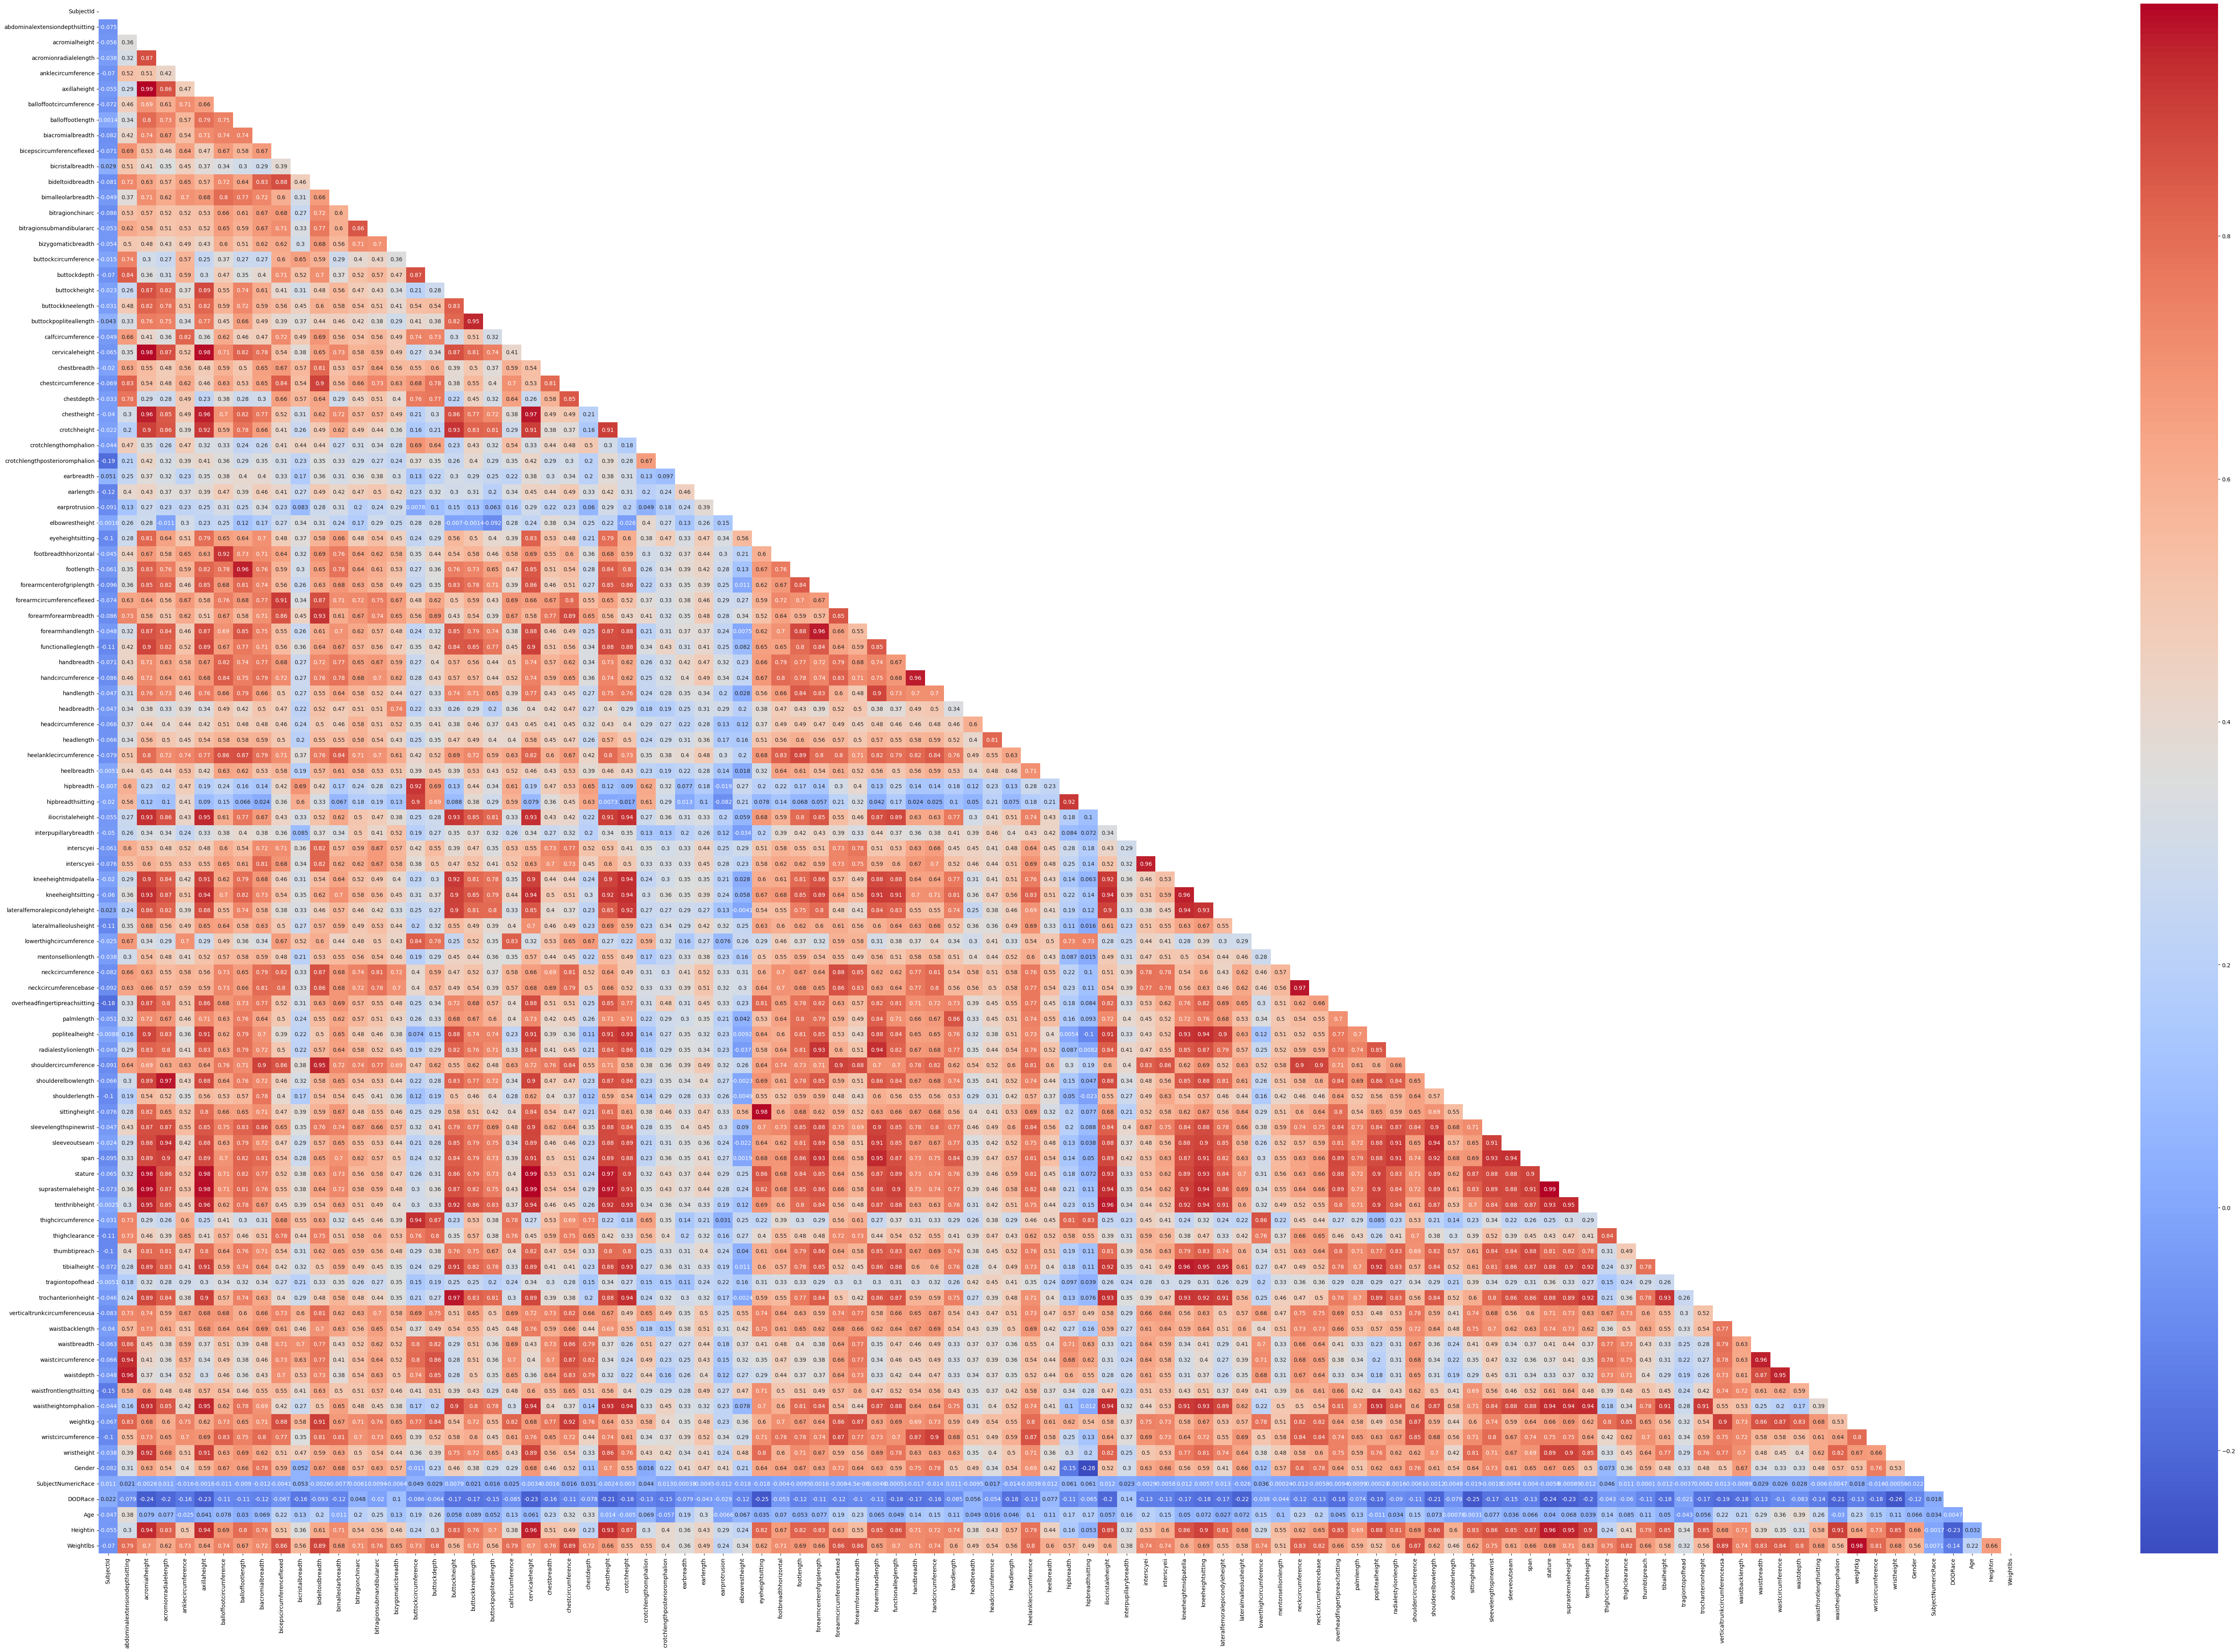

In [9]:

# display corrolation matrix in leatmap
f,ax = plt.subplots(figsize=(77,50))
mask = np.triu(np.ones_like(corr,dtype=bool))

sns.heatmap(corr , annot=True , mask=mask , cmap='coolwarm')

How to drop out highly correlated features in Python?



      have a huge data set and prior to machine learning modeling it is always suggested that first you should remove highly correlated descriptors(columns) how can i calculate the column wice correlation and remove the column with a threshold value say remove all the columns or descriptors having >0.8 correlation. also it should retained the headers in reduce data..
      The value of the correlation coefficient can take any values from -1 to 1.
      If the value is 1, it is said to be a positive correlation between two variables. This means that when one variable increases, the other variable also increases.
      If the value is -1, it is said to be a negative correlation between the two variables. This means that when one variable increases, the other variable decreases.
      If the value is 0, there is no correlation between the two variables. This means that the variables changes in a random manner with respect to each other.

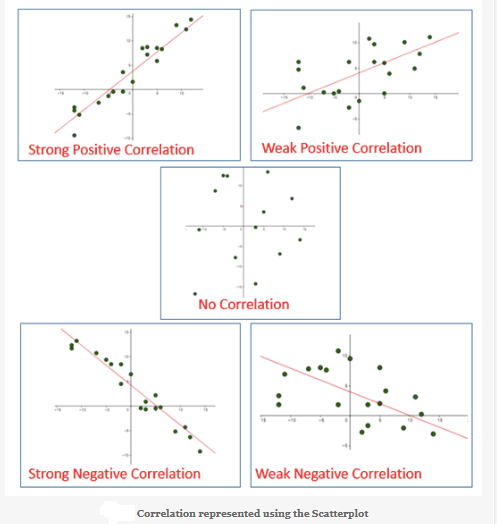

How to Drop Highly Correlated Features in Python?


    Do you want to improve the performance and accuracy of your machine-learning model? One of the most effective ways to do this is by dropping correlated features.

Why Remove Highly Correlated Variables? 

    In data science, it's essential to understand how to deal with highly correlated features. Highly correlated features refer to variables that have a strong linear relationship with each other. When two or more variables are highly correlated, they carry almost the same information, making it redundant to include all of them in a model. This can lead to a problem known as multicollinearity where it becomes difficult to determine the independent effect of each variable on the target variable. To address this issue, removing features with high correlation is advisable to improve the efficiency and accuracy of the prediction model. Thus, removing highly correlated variables is a crucial step in data preprocessing and can help improve the performance of your machine-learning models. 
    So we must find the correlation between the features and remove the highly correlated features with a correlation coefficient more significant than a specific limit.

In [10]:
# Create correlation matrix
corr_matrix = data.corr().abs()
corr_matrix


,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
SubjectId,1.000000,0.074702,0.056287,0.037505,0.070446,0.055057,0.071510,0.001430,0.082150,0.070572,...,0.044038,0.066602,0.101394,0.037595,0.082133,0.010501,0.021578,0.046753,0.054552,0.070158
abdominalextensiondepthsitting,0.074702,1.000000,0.360623,0.321755,0.524747,0.290821,0.459174,0.342050,0.421544,0.691460,...,0.162457,0.825714,0.550544,0.389220,0.313676,0.021201,0.079167,0.380614,0.300027,0.793634
acromialheight,0.056287,0.360623,1.000000,0.872475,0.512417,0.987452,0.693403,0.802922,0.735565,0.529353,...,0.933248,0.684610,0.734622,0.922687,0.626794,0.002789,0.235121,0.078582,0.944577,0.702188
acromionradialelength,0.037505,0.321755,0.872475,1.000000,0.424626,0.862074,0.605970,0.734323,0.672158,0.461094,...,0.851464,0.603964,0.646149,0.684979,0.544591,0.011185,0.201095,0.076888,0.831055,0.620289
anklecircumference,0.070446,0.524747,0.512417,0.424626,1.000000,0.469964,0.711720,0.569457,0.541868,0.643211,...,0.420109,0.745950,0.702178,0.514394,0.397710,0.015973,0.158360,0.025016,0.499770,0.730350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SubjectNumericRace,0.010501,0.021201,0.002789,0.011185,0.015973,0.001554,0.010784,0.009037,0.011861,0.004081,...,0.004667,0.017597,0.016068,0.000558,0.022229,1.000000,0.017987,0.033750,0.001742,0.007052
DODRace,0.021578,0.079167,0.235121,0.201095,0.158360,0.229070,0.108116,0.113672,0.124767,0.066587,...,0.212210,0.133350,0.181502,0.257819,0.118576,0.017987,1.000000,0.004738,0.227227,0.135988
Age,0.046753,0.380614,0.078582,0.076888,0.025016,0.040748,0.077855,0.030007,0.068712,0.217227,...,0.030264,0.228096,0.148806,0.105944,0.065747,0.033750,0.004738,1.000000,0.031826,0.220190
Heightin,0.054552,0.300027,0.944577,0.831055,0.499770,0.939310,0.691724,0.797004,0.756733,0.510416,...,0.905858,0.636173,0.733900,0.854877,0.660288,0.001742,0.227227,0.031826,1.000000,0.659988


In [11]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
SubjectId,NaN,0.074702,0.056287,0.037505,0.070446,0.055057,0.071510,0.001430,0.082150,0.070572,...,0.044038,0.066602,0.101394,0.037595,0.082133,0.010501,0.021578,0.046753,0.054552,0.070158
abdominalextensiondepthsitting,NaN,NaN,0.360623,0.321755,0.524747,0.290821,0.459174,0.342050,0.421544,0.691460,...,0.162457,0.825714,0.550544,0.389220,0.313676,0.021201,0.079167,0.380614,0.300027,0.793634
acromialheight,NaN,NaN,NaN,0.872475,0.512417,0.987452,0.693403,0.802922,0.735565,0.529353,...,0.933248,0.684610,0.734622,0.922687,0.626794,0.002789,0.235121,0.078582,0.944577,0.702188
acromionradialelength,NaN,NaN,NaN,NaN,0.424626,0.862074,0.605970,0.734323,0.672158,0.461094,...,0.851464,0.603964,0.646149,0.684979,0.544591,0.011185,0.201095,0.076888,0.831055,0.620289
anklecircumference,NaN,NaN,NaN,NaN,NaN,0.469964,0.711720,0.569457,0.541868,0.643211,...,0.420109,0.745950,0.702178,0.514394,0.397710,0.015973,0.158360,0.025016,0.499770,0.730350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SubjectNumericRace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.017987,0.033750,0.001742,0.007052
DODRace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004738,0.227227,0.135988
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031826,0.220190
Heightin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.659988


In [12]:
train_data, test_data = train_test_split(data[['weightkg','buttockcircumference','crotchheight','thighcircumference','Gender', 'stature']], test_size=0.2, random_state=25)

In [13]:
Y_test = test_data['Gender'].to_numpy()


In [14]:

for k in [3,5,7,9,15] :
    knn = KNN(k)
    knn.fit(  train_data[['weightkg' ,'buttockcircumference']].to_numpy() , train_data['Gender'].to_numpy())
    score =knn.evaluate(test_data[['weightkg' ,'buttockcircumference']].to_numpy() , Y_test)
    print(f'score in k={k} is {score*100:.2f}%.')

score in k=3 is 97.86%.
score in k=5 is 97.94%.
score in k=7 is 98.11%.
score in k=9 is 98.02%.
score in k=15 is 97.86%.


In [16]:
from sklearn.neighbors import KNeighborsClassifier

Y_test = test_data['Gender'].to_numpy()
for k in [3, 5, 7, 9, 15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data[['weightkg','buttockcircumference']], train_data['Gender'])
    
    Y_pred = knn.predict(test_data[['weightkg','buttockcircumference']])
    score = np.sum(Y_pred == Y_test) / Y_pred.shape[0]
    print(f'Score in k = {k} is {score*100:.2f}%.')

Score in k = 3 is 97.86%.
Score in k = 5 is 97.94%.
Score in k = 7 is 98.11%.
Score in k = 9 is 98.02%.
Score in k = 15 is 97.86%.


| k      | Score  |
| :---   | :----: |
| 3      | 97.86%  |
| 5      | 97.94%  |
| 7      | 98.11%  |
| 10     | 98.02%  |
| 15     | 97.86% |

In [17]:
for k in [3,5,7,9,15] :
    knn = KNN(k)
    knn.fit(  train_data[['weightkg' ,'crotchheight']].to_numpy() , train_data['Gender'].to_numpy()   )
    score =knn.evaluate(test_data[['weightkg' ,'crotchheight']].to_numpy() , Y_test)
    print(f'score in k={k} is {score*100:.2f}%.')

score in k=3 is 78.50%.
score in k=5 is 80.48%.
score in k=7 is 81.30%.
score in k=9 is 81.80%.
score in k=15 is 81.88%.


| k      | Score   |
| :---   | :----:  |
| 3      | 78.50%  |
| 5      | 80.48%  |
| 7      | 81.30%  |
| 9     | 81.80%   |
| 15     | 81.88%  |

In [18]:
from sklearn.neighbors import KNeighborsClassifier

Y_test = test_data['Gender'].to_numpy()
for k in [3, 5, 7, 9, 15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data[['weightkg','crotchheight']], train_data['Gender'])
    
    Y_pred = knn.predict(test_data[['weightkg','crotchheight']])
    score = np.sum(Y_pred == Y_test) / Y_pred.shape[0]
    print(f'score in k = {k} is {score*100:.2f}%.')

score in k = 3 is 78.25%.
score in k = 5 is 80.56%.
score in k = 7 is 81.30%.
score in k = 9 is 81.80%.
score in k = 15 is 82.04%.


| k      | Score   |
| :---   | :----:  |
| 3      | 78.25%  |
| 5      | 80.56%  |
| 7      | 81.30%  |
| 9      | 81.80%  |
| 15     | 82.04%  |

In [19]:
for k in [3,5,7,9,15] :
    knn = KNN(k)
    knn.fit(  train_data[['weightkg' ,'thighcircumference']].to_numpy() , train_data['Gender'].to_numpy())
    score =knn.evaluate(test_data[['weightkg' ,'thighcircumference']].to_numpy() , Y_test)
    print(f'score in k={k} is {score*100:.2f}%.')

score in k=3 is 93.66%.
score in k=5 is 93.49%.
score in k=7 is 93.99%.
score in k=9 is 93.82%.
score in k=15 is 94.65%.


In [20]:
from sklearn.neighbors import KNeighborsClassifier

Y_test = test_data['Gender'].to_numpy()
for k in [3, 5, 7, 9, 15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data[['weightkg','thighcircumference']], train_data['Gender'])
    
    Y_pred = knn.predict(test_data[['weightkg','thighcircumference']])
    score = np.sum(Y_pred == Y_test) / Y_pred.shape[0]
    print(f'Score in k = {k} is {score*100:.2f}%.')

Score in k = 3 is 93.49%.
Score in k = 5 is 93.41%.
Score in k = 7 is 93.99%.
Score in k = 9 is 93.90%.
Score in k = 15 is 94.65%.
